Missing values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Shape: (918, 12)

Preview:
    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3         

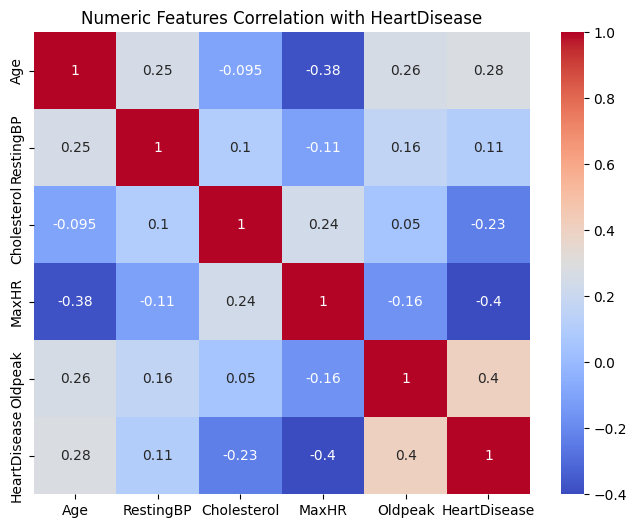

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind

# Load dataset
df = pd.read_csv("heart.csv")  # filename from Kaggle download

# 1. Check missing values
print("Missing values:\n", df.isnull().sum())

# 2. Basic info
print("\nShape:", df.shape)
print("\nPreview:\n", df.head())

# Encode target
y = df["HeartDisease"]

# 3. Continuous features association with target
num_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
for col in num_cols:
    group0 = df[df["HeartDisease"]==0][col].dropna()
    group1 = df[df["HeartDisease"]==1][col].dropna()
    stat, p = ttest_ind(group0, group1)
    print(f"{col:12s} mean0={group0.mean():.2f}, mean1={group1.mean():.2f}, p={p:.4e}")

# 4. Categorical features association with target
cat_cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope"]
for col in cat_cols:
    ct = pd.crosstab(df[col], y)
    chi2, p, dof, exp = chi2_contingency(ct)
    print(f"{col:12s} chi2={chi2:.2f}, p={p:.4e}")

# 5. Correlation heatmap for numeric
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols + ["HeartDisease"]].corr(), annot=True, cmap="coolwarm")
plt.title("Numeric Features Correlation with HeartDisease")
plt.show()


In [3]:
df = df[df["RestingBP"] > 0]
import numpy as np

df["Cholesterol"] = df["Cholesterol"].replace(0, np.nan)
df["Cholesterol"].fillna(df["Cholesterol"].median(), inplace=True)

out_file = 'dataset1_cleaned.csv'
df.to_csv(out_file,index=False)
out_file

C:\Users\Elvis\AppData\Local\Temp\ipykernel_10588\1770405347.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cholesterol"].fillna(df["Cholesterol"].median(), inplace=True)


'dataset1_cleaned.csv'